In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import gravity_model as gm

The mobility dataset is available on Figshare:
https://figshare.com/projects/Multiple_gravity_laws_for_human_mobility_within_cities/166745

In [2]:
# Configurations

# Set data directory
data_dir = "/data02/mobility_gravity"
country = "US"
cities = ["NYC", "LAX", "CHI", "DAL", "HOU", "WAS", "MIA", "PHL", "ATL", "PHX", "BOS", "SFR"]

mbins = 10 # number of population bins

### Figure 1

In [3]:
city = "CHI"

# Load model
model = gm.gravity_model(data_dir, country, city, cost="rij")
model.exponent_matrix(rmin=1, rmax=50, mbins=mbins, rbins=100)

mob_data = pd.merge(model.mob_data, model.pop_data.rename(columns={"id": "o", "bin": "bin_o"})[["o", "bin_o"]], on="o", how="left")
mob_data = pd.merge(mob_data, model.pop_data.rename(columns={"id": "d", "bin": "bin_d"})[["d", "bin_d"]], on="d", how="left")

# Figure setting
plt.rcParams['font.family'] = 'Arial'
plt.rcParams["figure.figsize"] = (7, 7)

cmap = plt.cm.Set3

Calculating exponent: 100it [01:17,  1.29it/s]


### Figure 1(d)
Distance exponent estimation for the whole dataset.

/home/ohhyun/.pyenv/versions/3.6.8/envs/ohhyun/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


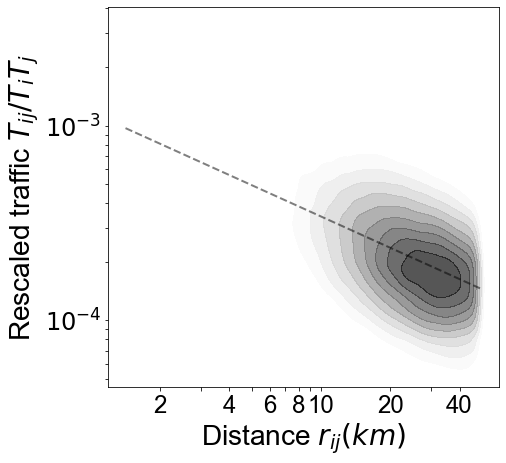

In [4]:
data = mob_data.copy()

# Data binning
x_bin = [
    (x1 + x2) / 2
    for x1, x2 in zip(model.bin_distance[:-1], model.bin_distance[1:])
]

y_bin_list = [
    [
        y_val
        for x_val, y_val in zip(data.rij, data.rescaled_tij)
        if (x_val >= model.bin_distance[i])
        and (x_val < model.bin_distance[i + 1])
    ]
    for i in range(mbins**2)
]
x_bin = [x_val for x_val, y_vals in zip(x_bin, y_bin_list) if len(y_vals) != 0]
y_bin = [np.mean(y_vals) for y_vals in y_bin_list if len(y_vals) != 0]

X_bin = np.array([np.log(x) for x in x_bin]).reshape(-1, 1)
Y_bin = np.array([np.log(y) for y in y_bin]).reshape(-1, 1)

X = np.log(data.rij)
Y = np.log(data.rescaled_tij)

X_ = sm.add_constant(X)

# OLS linear regression
result = sm.OLS(Y, X_).fit()

a = result.params[1]
b = result.params[0]

# Plot result
sns.kdeplot(X, Y, alpha=0.7, cmap="Greys", shade=True, thresh=0.3)
plt.plot([min(X), max(X)], [a*min(X)+b, a*max(X)+b], c="k", ls="--", alpha=0.5, linewidth=2)

plt.xlabel("Distance $r_{ij} (km)$", fontsize=28)
plt.ylabel("Rescaled traffic $T_{ij}/T_iT_j$", fontsize=28)
plt.xticks([np.log(2), np.log(3), np.log(4), np.log(5), np.log(6), np.log(7), np.log(8), np.log(9), np.log(10), np.log(20), np.log(30), np.log(40)], 
           ["2", "", "4", "", "6", "", "8", "", "10", "20", "", "40"], 
           fontsize=24)
plt.yticks([np.log(0.01), 
            np.log(0.009), np.log(0.008), np.log(0.007), np.log(0.006), np.log(0.005), np.log(0.004), np.log(0.003), np.log(0.002), np.log(0.001), 
            np.log(0.0009), np.log(0.0008), np.log(0.0007), np.log(0.0006), np.log(0.0005), np.log(0.0004), np.log(0.0003), np.log(0.0002), np.log(0.0001), 
            np.log(0.00009), np.log(0.00008), np.log(0.00007), np.log(0.00006), np.log(0.00005)], 
           ["$10^{-2}$", "", "", "", "", "", "", "", "", "$10^{-3}$", "", "", "", "", "", "", "", "", "$10^{-4}$", "", "", "", "", ""], 
           fontsize=24)
plt.ylim([-10, -5.5])

plt.show()

### Figure 1(e)
Distance exponents estimations for different population groups.

/home/ohhyun/.pyenv/versions/3.6.8/envs/ohhyun/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ohhyun/.pyenv/versions/3.6.8/envs/ohhyun/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ohhyun/.pyenv/versions/3.6.8/envs/ohhyun/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

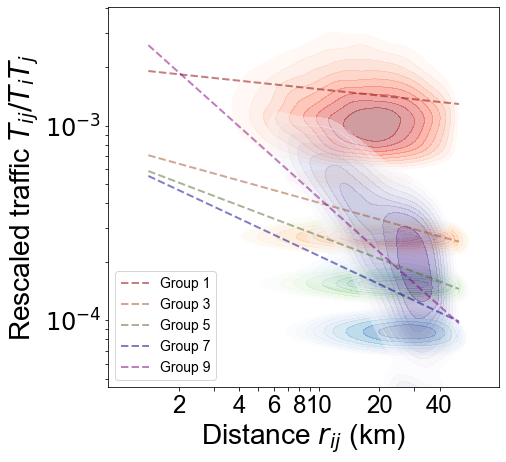

In [5]:
# Color palette
cmaps_bin = ["Reds", "Oranges", "Greens", "Blues", "Purples"]
cmaps_plot = ["darkred", "sienna", "darkolivegreen", "darkblue", "purple"]

# Estimate gamma for various population groups
for n, i in enumerate(range(0, mbins, 2)):
    data = mob_data[(mob_data.bin_o == i) & (mob_data.bin_d == i)]
    
    # Data binning
    x_bin = [
        (x1 + x2) / 2
        for x1, x2 in zip(model.bin_distance[:-1], model.bin_distance[1:])
    ]

    y_bin_list = [
        [
            y_val
            for x_val, y_val in zip(data.rij, data.rescaled_tij)
            if (x_val >= model.bin_distance[i])
            and (x_val < model.bin_distance[i + 1])
        ]
        for i in range(mbins**2)
    ]
    x_bin = [x_val for x_val, y_vals in zip(x_bin, y_bin_list) if len(y_vals) != 0]
    y_bin = [np.mean(y_vals) for y_vals in y_bin_list if len(y_vals) != 0]

    X_bin = np.array([np.log(x) for x in x_bin]).reshape(-1, 1)
    Y_bin = np.array([np.log(y) for y in y_bin]).reshape(-1, 1)
    
    X = np.log(data.rij)
    Y = np.log(data.rescaled_tij)
    
    df = pd.DataFrame([X, Y]).T
    df["bin"] = i
    
    X_ = sm.add_constant(X)
    
    # OLS linear regression
    if len(X_) > 0:
        result = sm.OLS(Y, X_).fit()

        a = result.params[1]
        b = result.params[0]
    else:
        a = 0
        b = 0
    
    # Plot result
    label = "Group {0}".format(i+1)
    sns.kdeplot(X, Y, alpha=0.4, cmap=cmaps_bin[n], shade=True, thresh=0.3)
    if a != 0:
        plt.plot([min(X), max(X)], [a*min(X)+b, a*max(X)+b], c=cmaps_plot[n], ls="--", alpha=0.5, label=label, linewidth=2)

plt.xlabel("Distance $r_{ij}$ (km)", fontsize=28)
plt.ylabel("Rescaled traffic $T_{ij}/T_iT_j$", fontsize=28)
plt.legend(fontsize=18)
plt.legend(["Group {}".format(i+1) for i in range(0, mbins, 2)], fontsize=14)
plt.xticks([np.log(2), np.log(3), np.log(4), np.log(5), np.log(6), np.log(7), np.log(8), np.log(9), np.log(10), np.log(20), np.log(30), np.log(40)], 
           ["2", "", "4", "", "6", "", "8", "", "10", "20", "", "40"], 
           fontsize=24)
plt.yticks([np.log(0.01), 
            np.log(0.009), np.log(0.008), np.log(0.007), np.log(0.006), np.log(0.005), np.log(0.004), np.log(0.003), np.log(0.002), np.log(0.001), 
            np.log(0.0009), np.log(0.0008), np.log(0.0007), np.log(0.0006), np.log(0.0005), np.log(0.0004), np.log(0.0003), np.log(0.0002), np.log(0.0001), 
            np.log(0.00009), np.log(0.00008), np.log(0.00007), np.log(0.00006), np.log(0.00005)], 
           ["$10^{-2}$", "", "", "", "", "", "", "", "", "$10^{-3}$", "", "", "", "", "", "", "", "", "$10^{-4}$", "", "", "", "", ""], 
           fontsize=24)
plt.ylim([-10, -5.5])

plt.show()

### Figure 2, 5, 6
Distance exponent (Figure 2), standard deviation (Figure 5) and average distance (Figure 6) matrices for the twelve most populated cities in the USA.

NYC


Calculating exponent: 1it [00:05,  5.94s/it]
Calculating exponent: 100it [02:13,  1.33s/it]


LAX


Calculating exponent: 1it [00:03,  3.54s/it]
Calculating exponent: 100it [01:21,  1.23it/s]


CHI


Calculating exponent: 1it [00:03,  3.49s/it]
Calculating exponent: 100it [01:15,  1.32it/s]


DAL


Calculating exponent: 1it [00:02,  2.85s/it]
Calculating exponent: 100it [01:07,  1.47it/s]


HOU


Calculating exponent: 1it [00:02,  2.16s/it]
Calculating exponent: 100it [00:51,  1.94it/s]


WAS


Calculating exponent: 1it [00:01,  1.62s/it]
Calculating exponent: 100it [00:36,  2.77it/s]


MIA


Calculating exponent: 1it [00:01,  1.40s/it]
Calculating exponent: 100it [00:31,  3.14it/s]


PHL


Calculating exponent: 1it [00:02,  2.22s/it]
Calculating exponent: 100it [00:53,  1.87it/s]


ATL


Calculating exponent: 1it [00:02,  2.35s/it]
Calculating exponent: 100it [01:00,  1.64it/s]


PHX


Calculating exponent: 1it [00:01,  1.51s/it]
Calculating exponent: 100it [01:26,  1.15it/s]


BOS


Calculating exponent: 1it [00:04,  4.87s/it]
Calculating exponent: 100it [02:17,  1.38s/it]


SFR


Calculating exponent: 1it [00:01,  1.99s/it]
Calculating exponent: 100it [00:15,  6.34it/s]


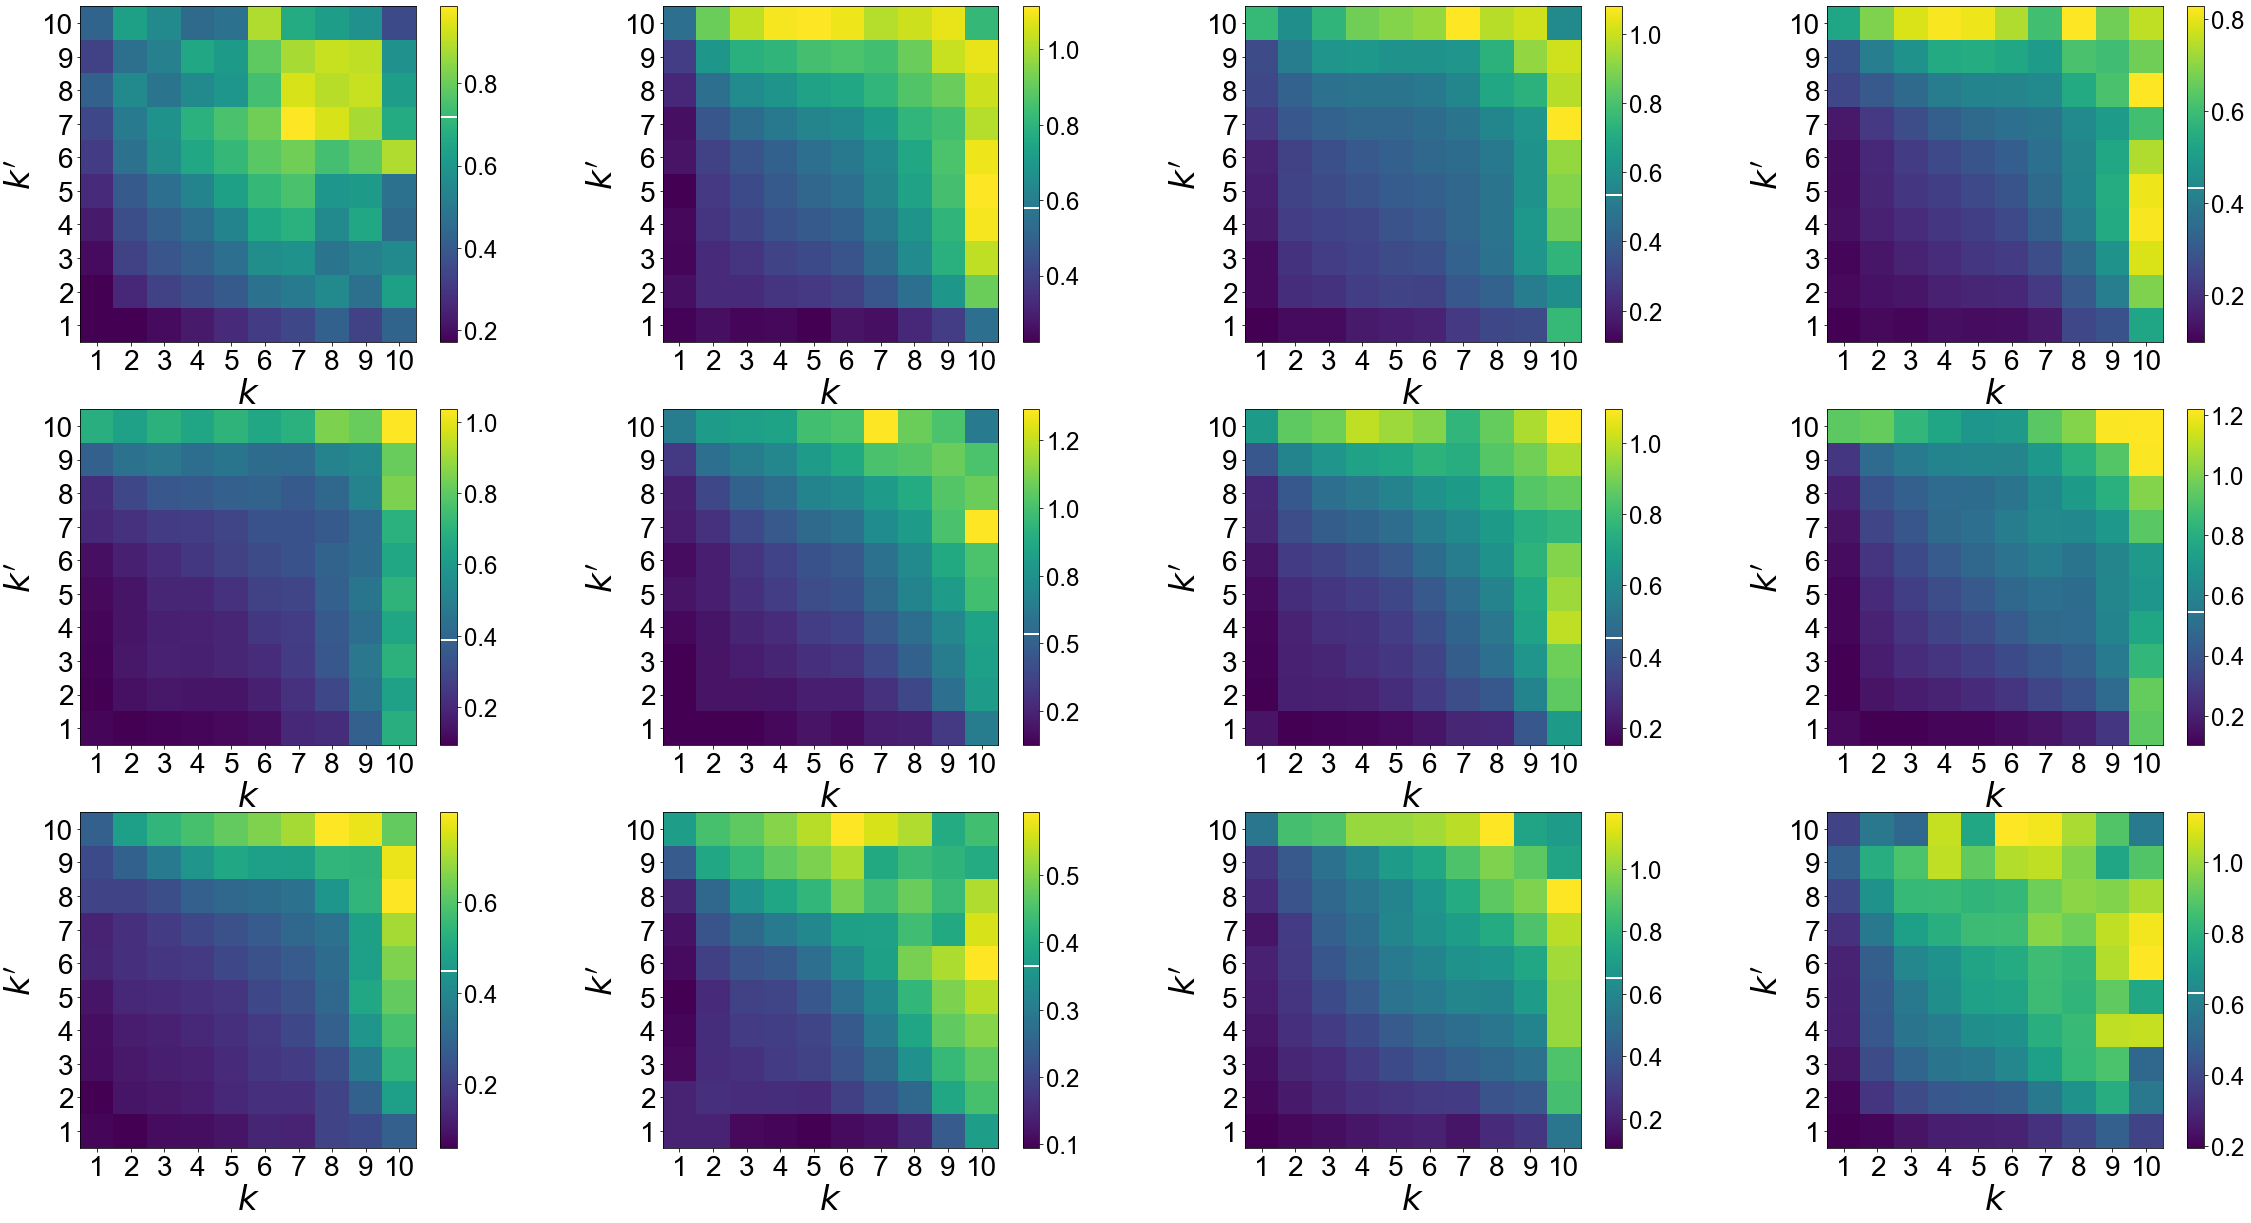

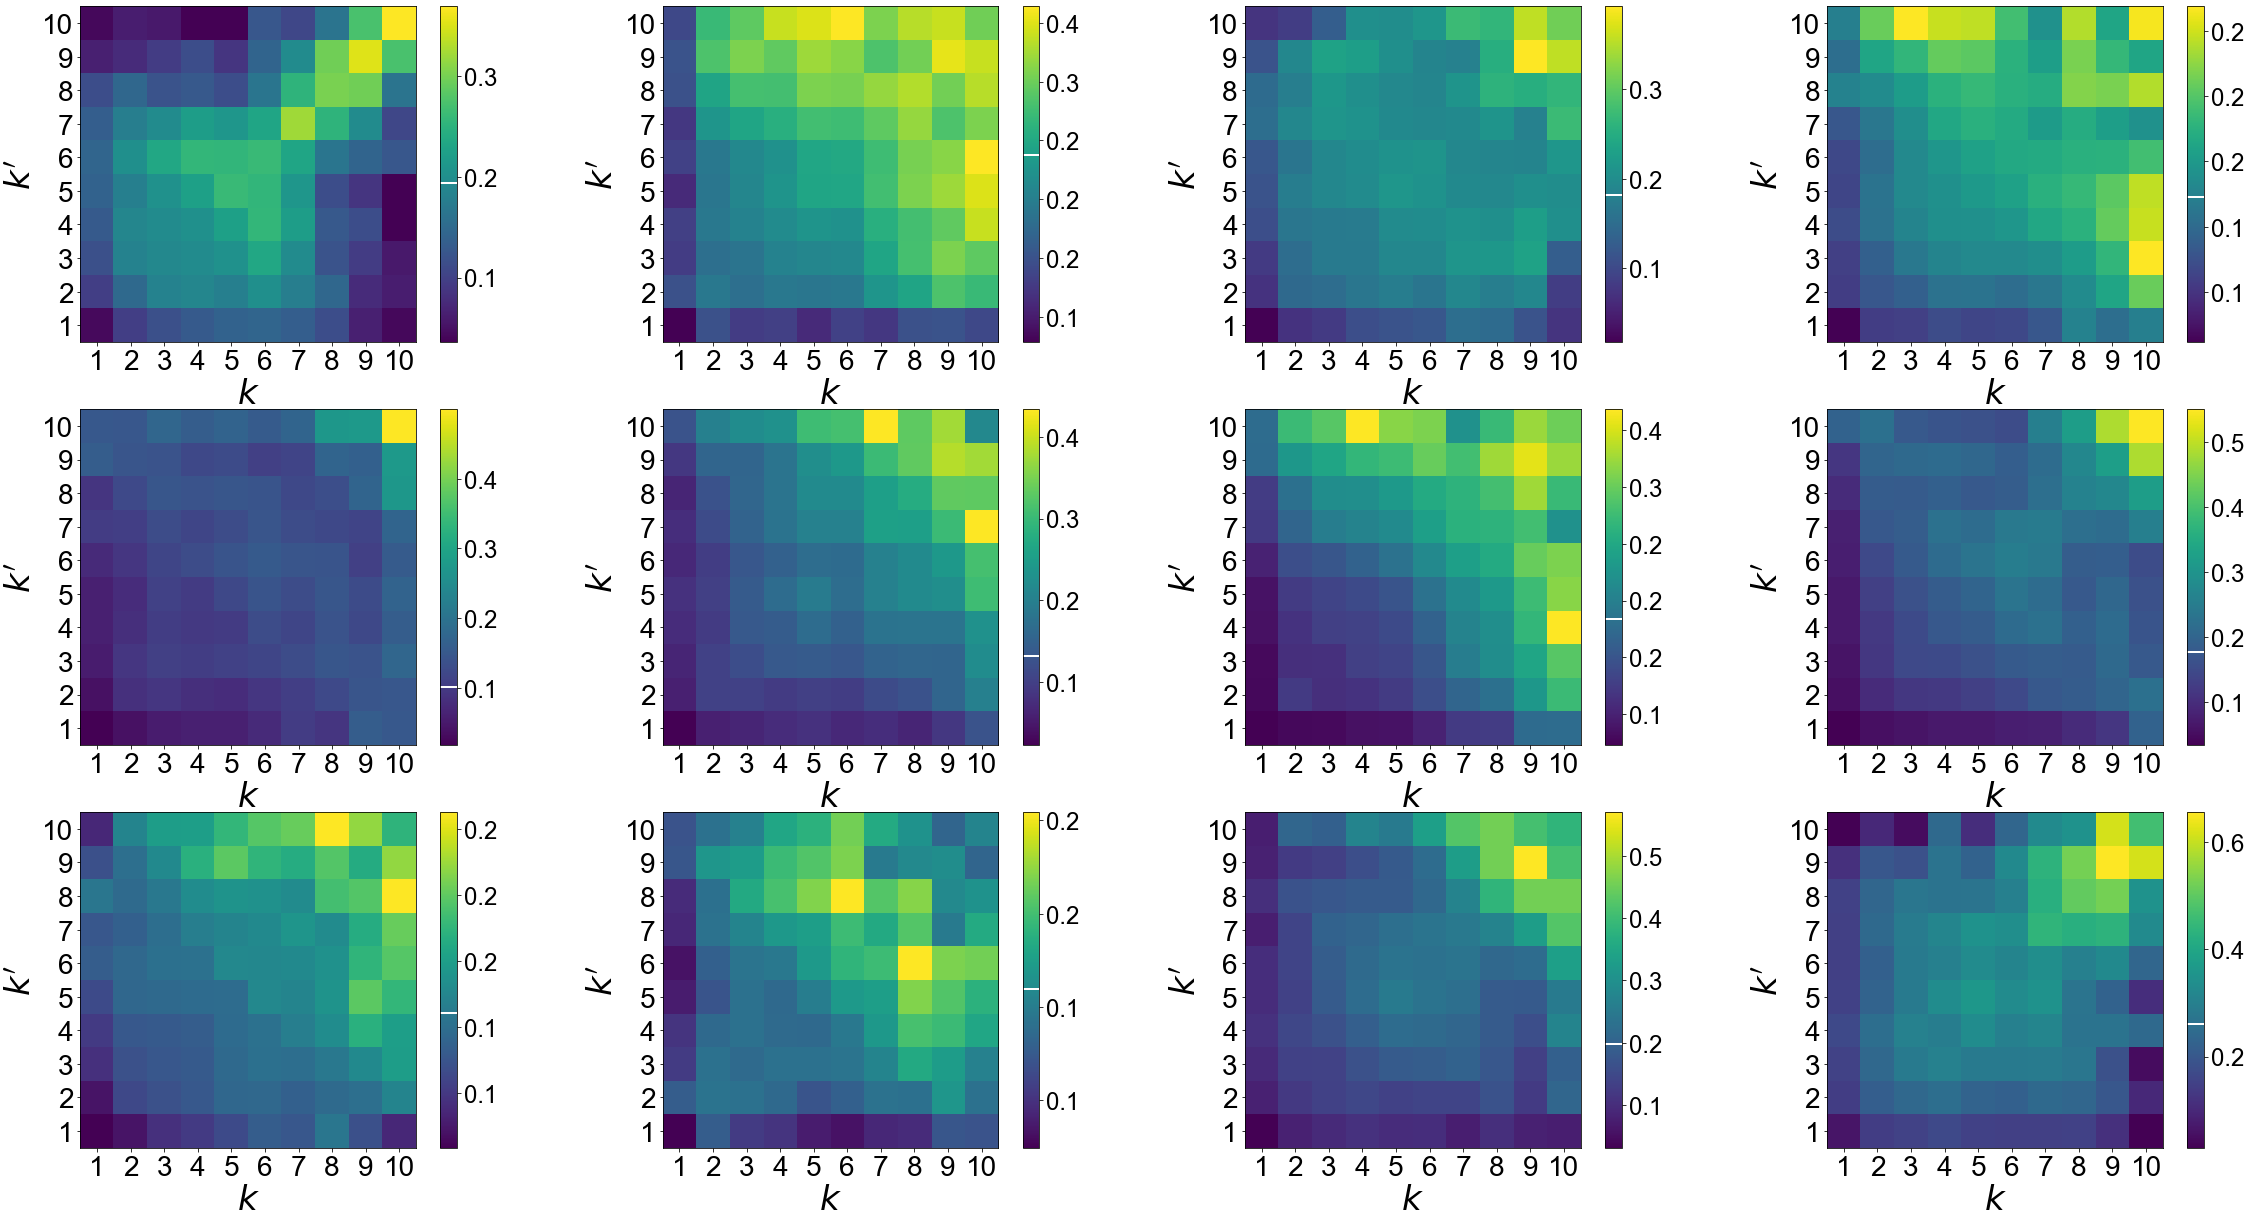

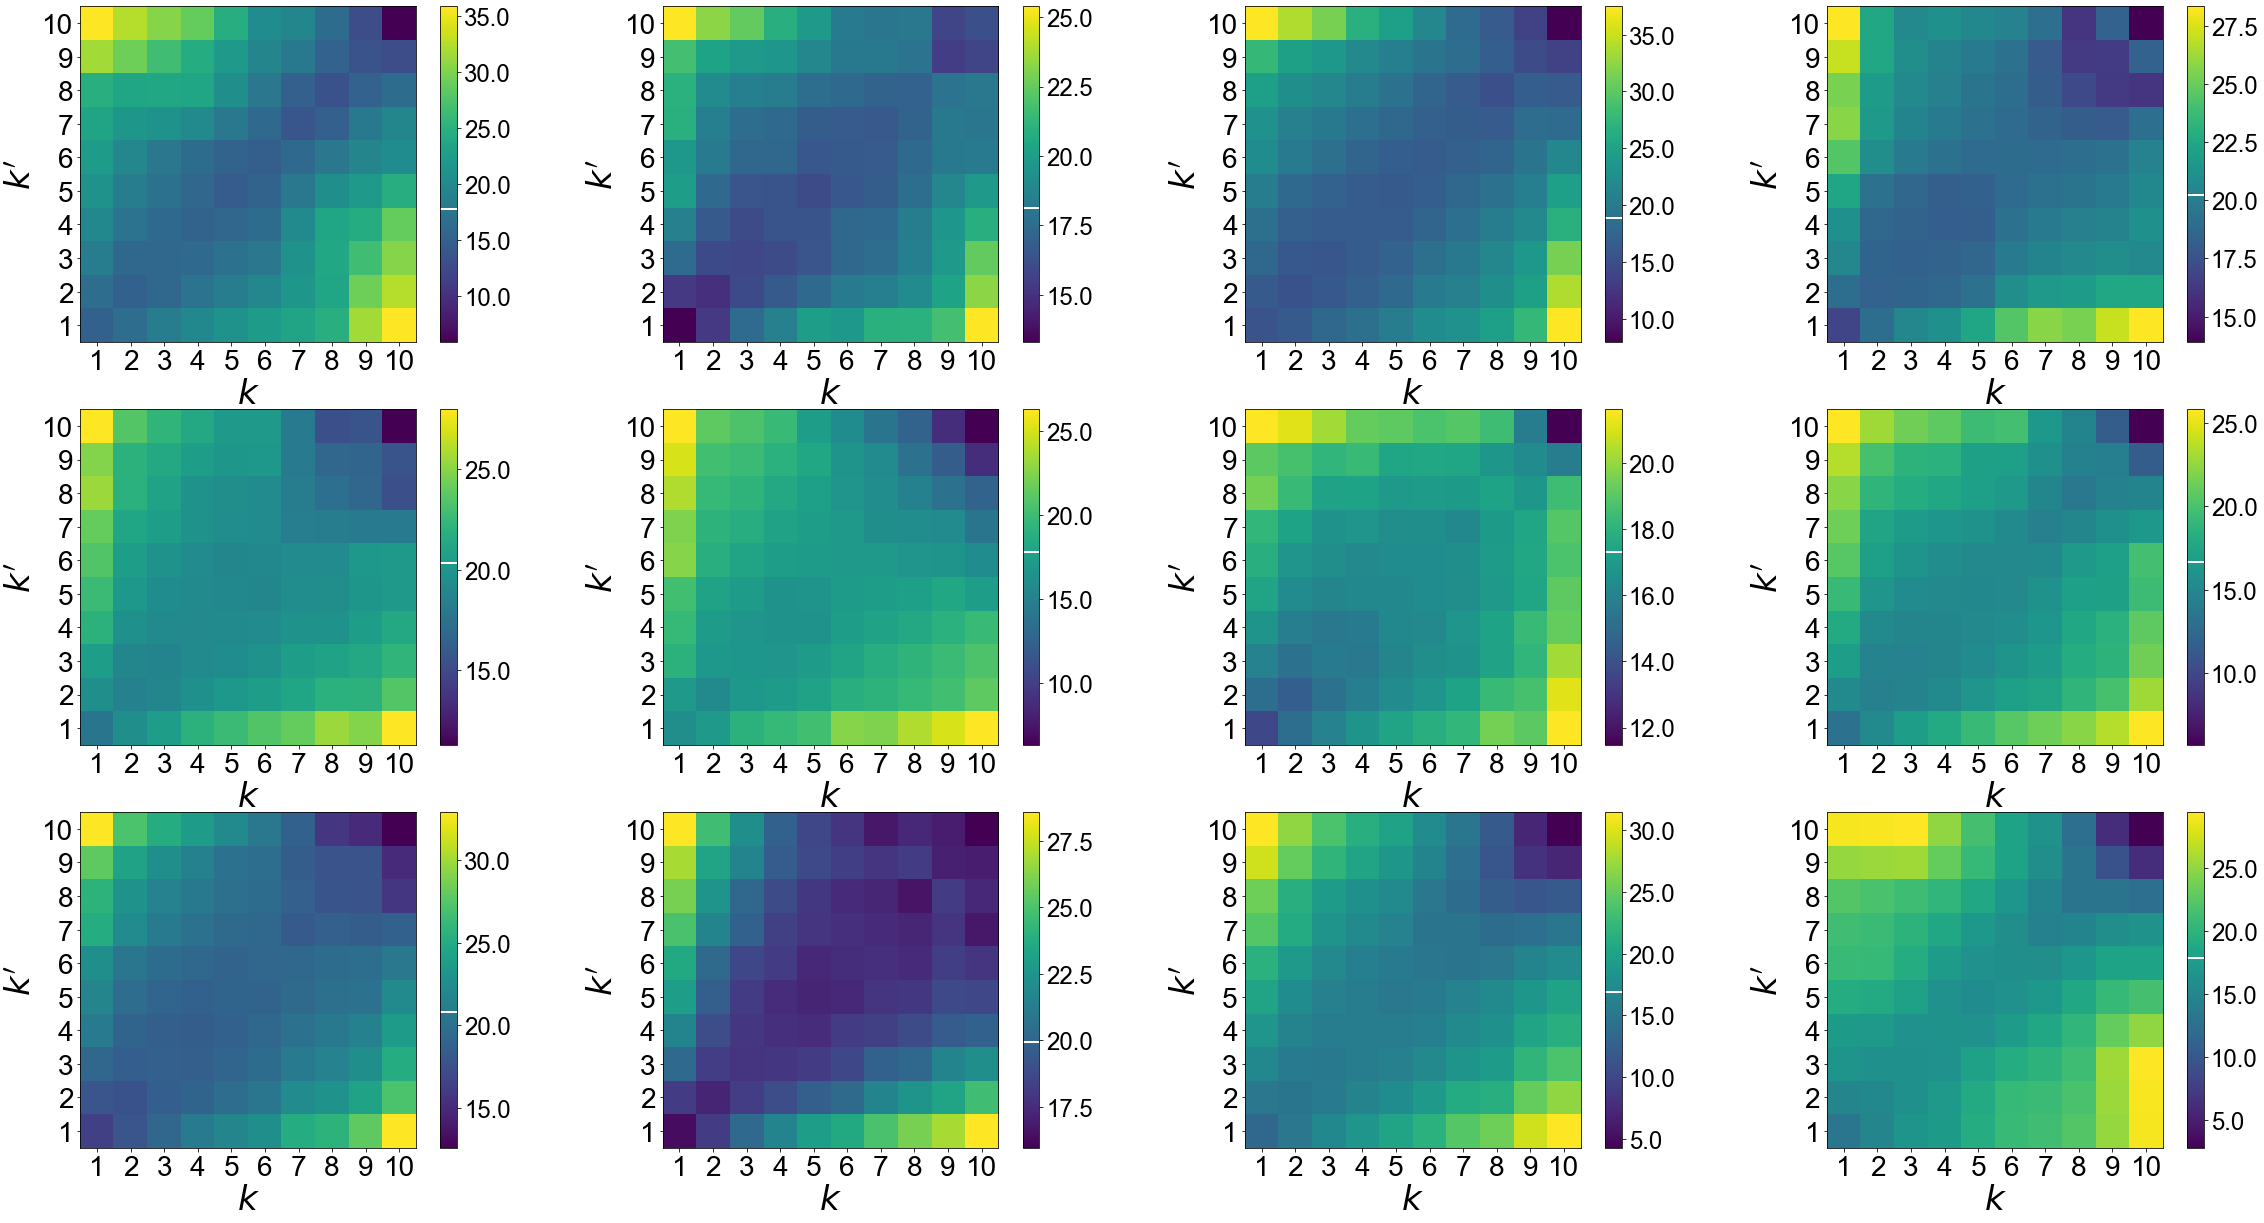

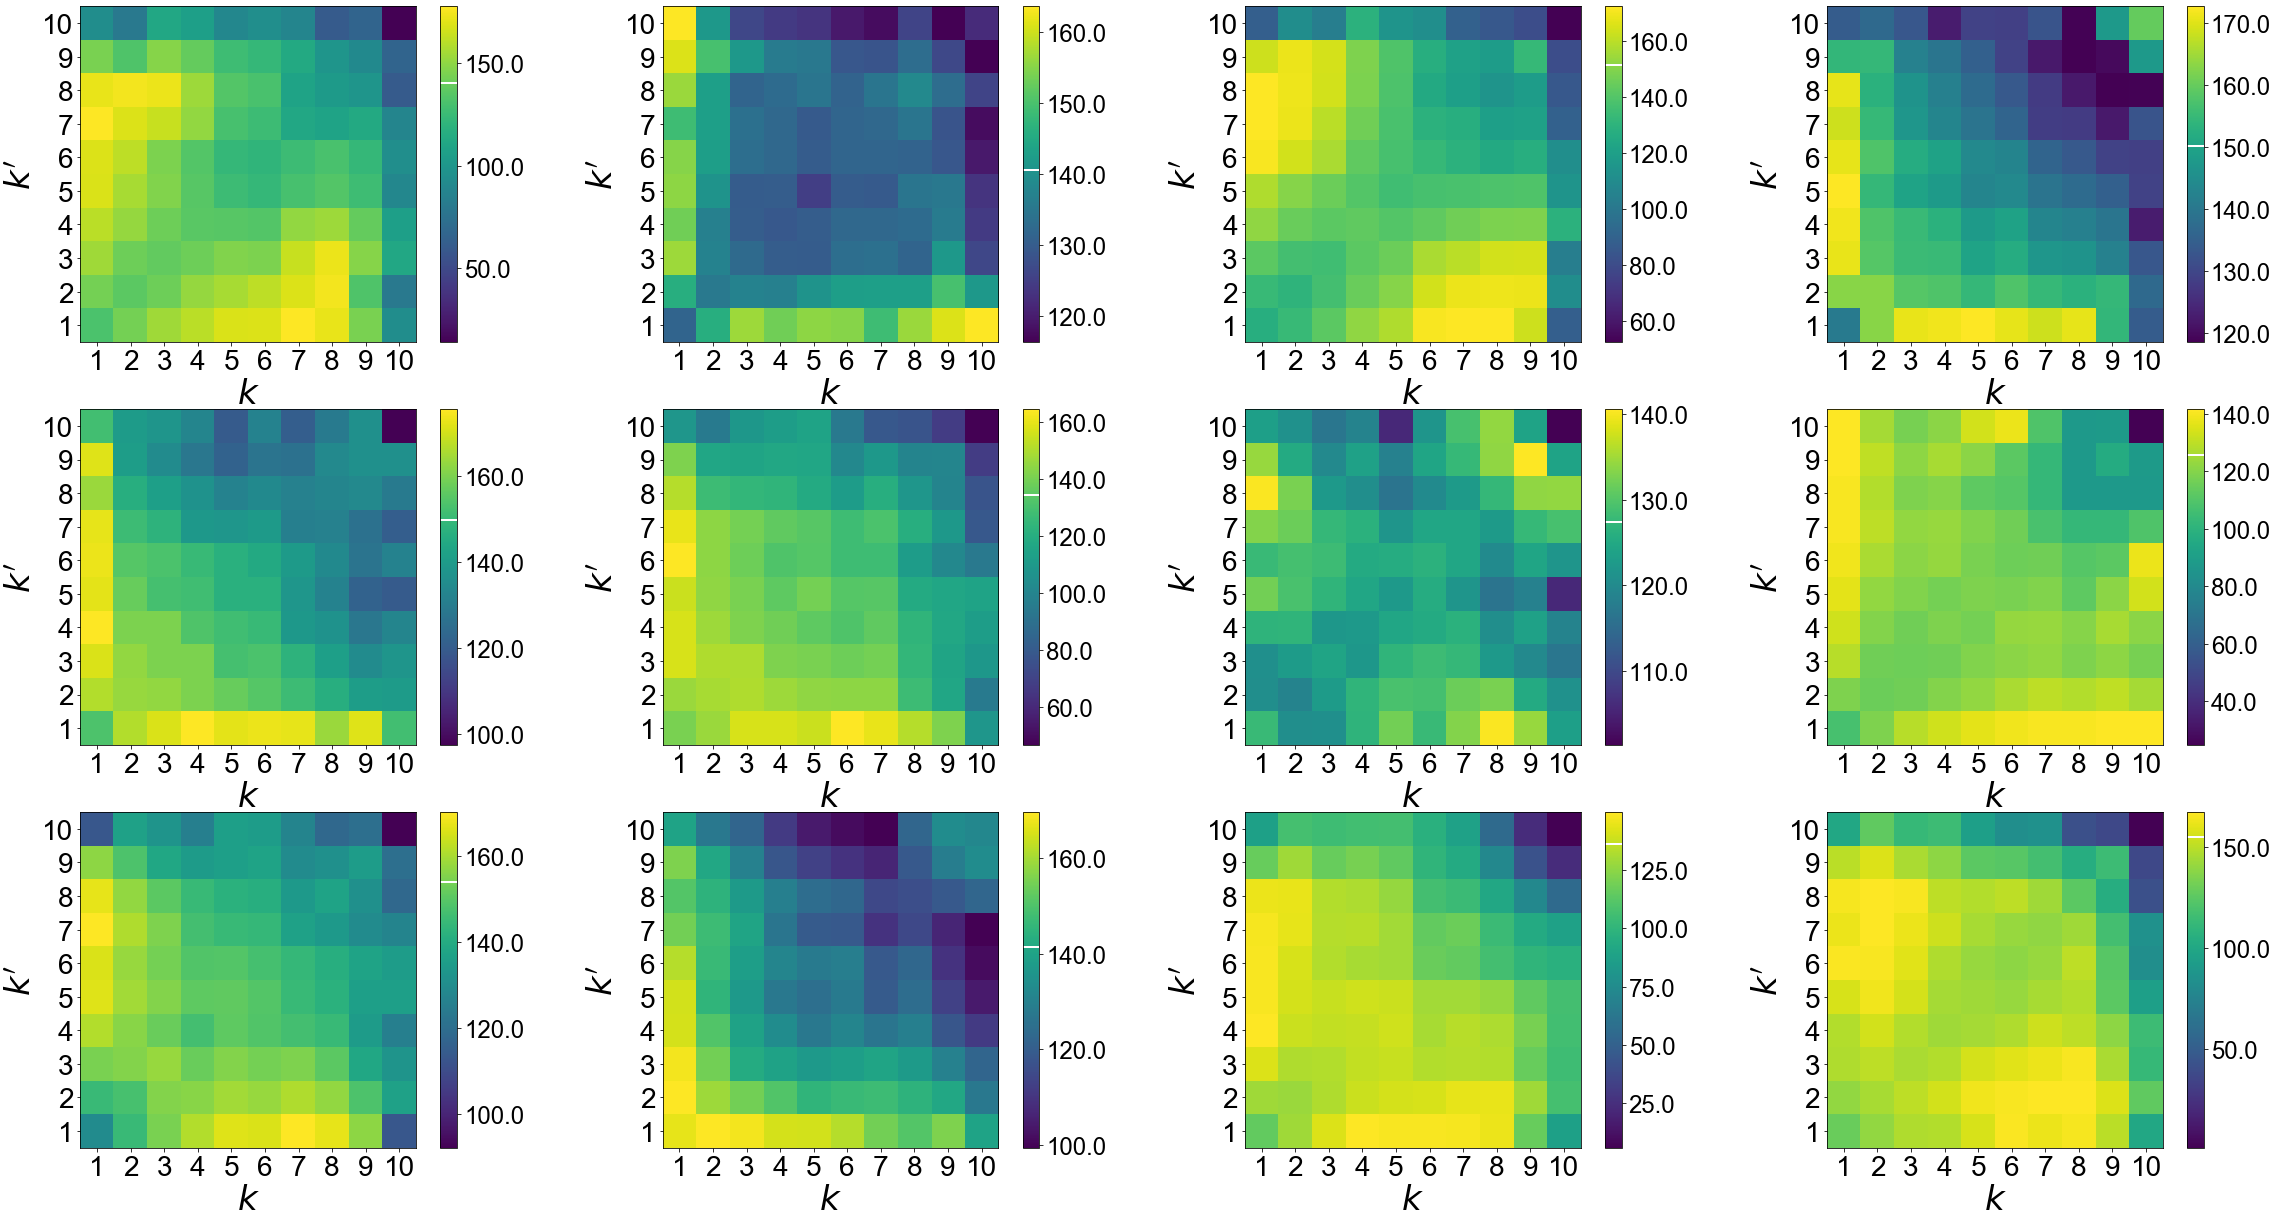

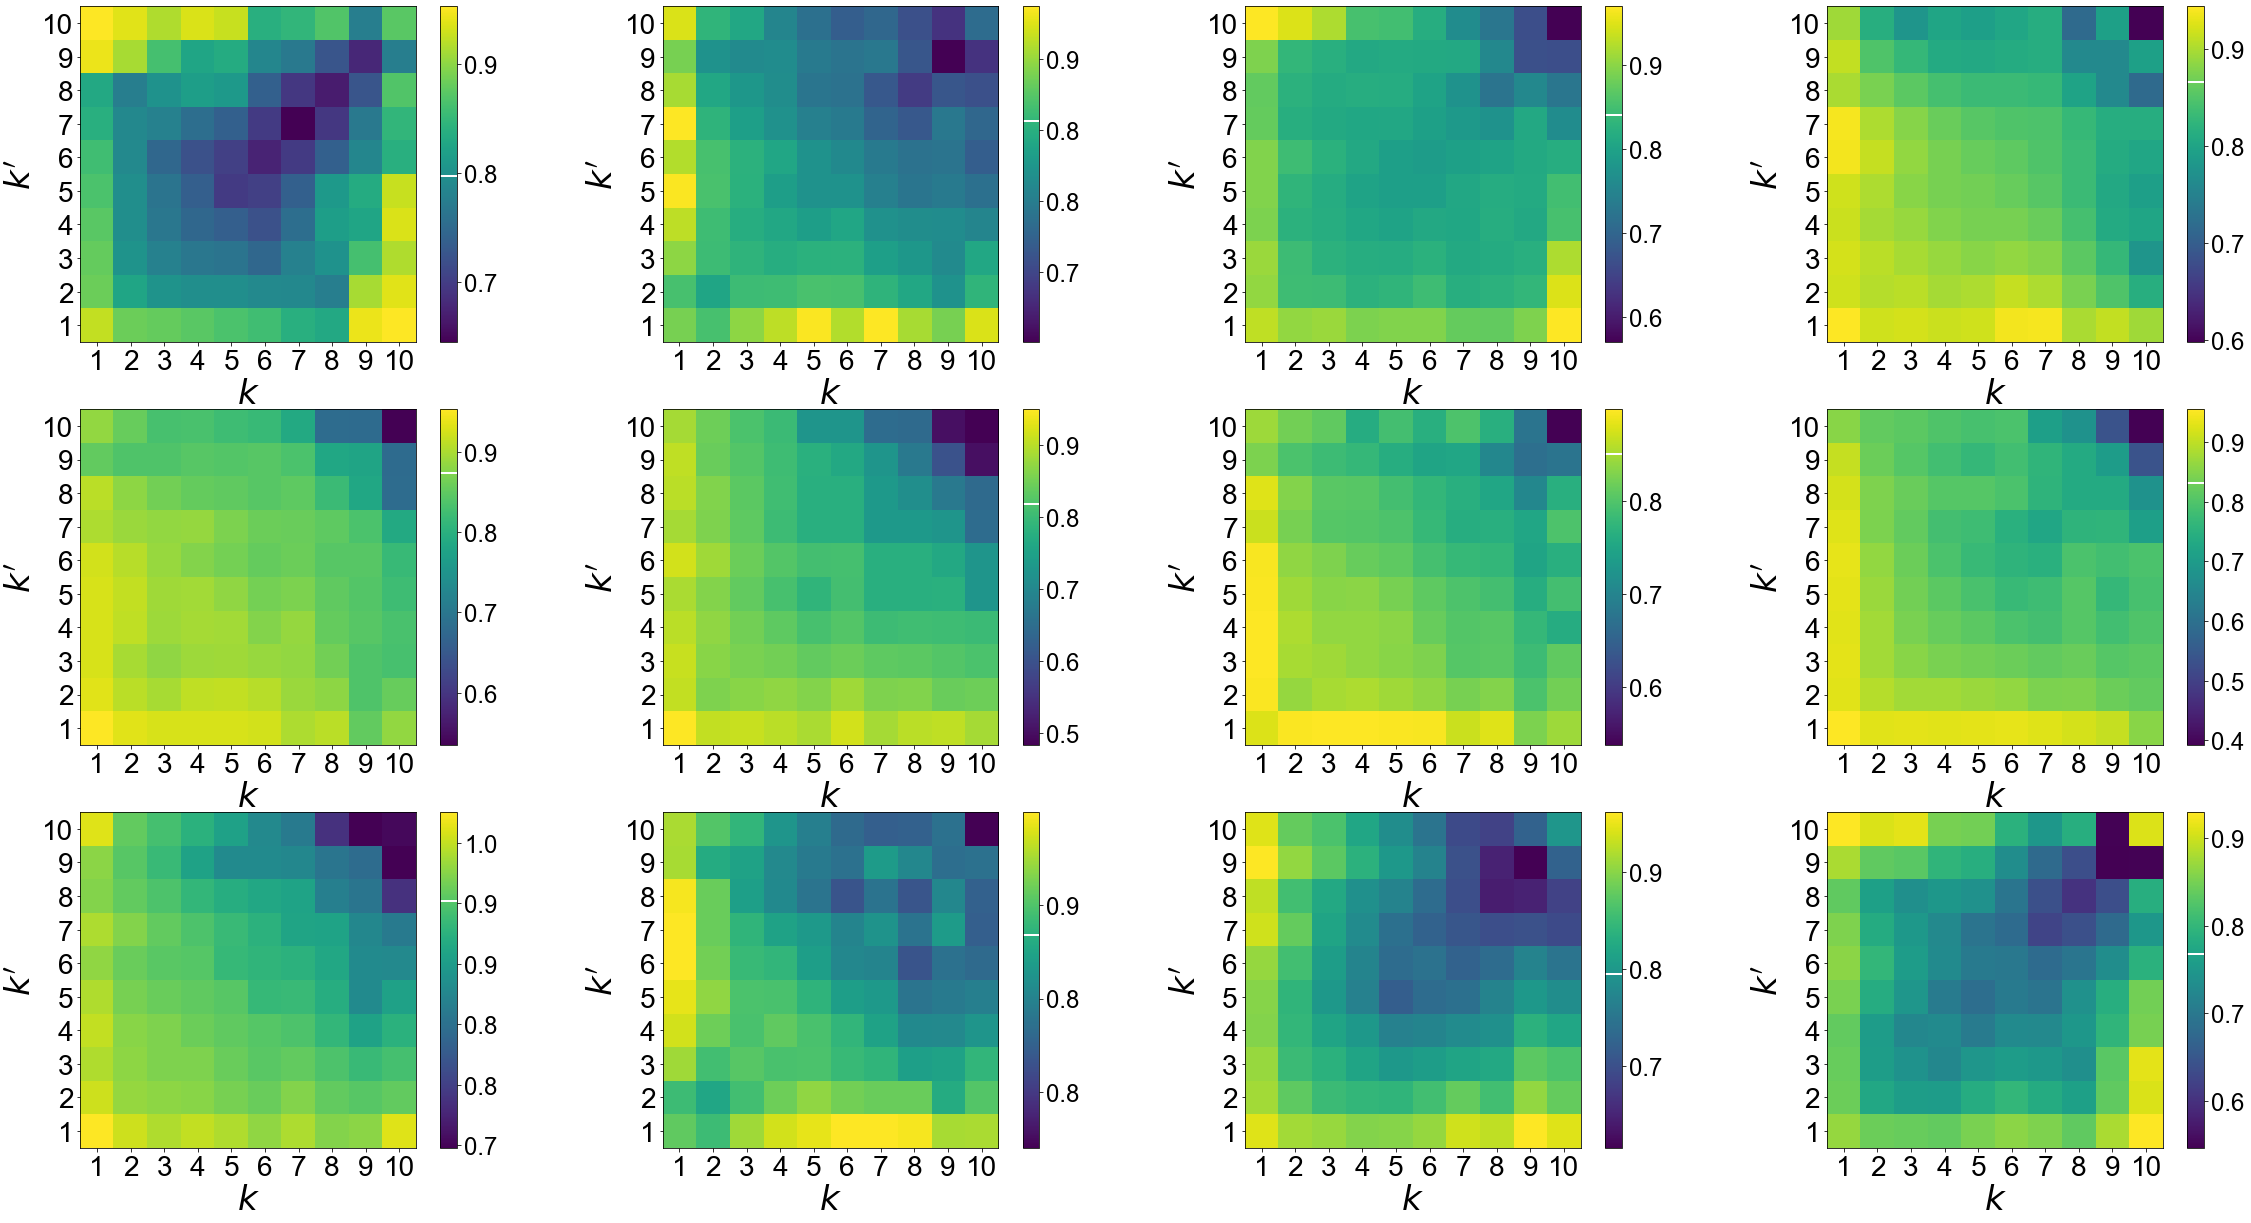

In [6]:
plt.rcParams['font.family'] = 'Arial'

# Data columns to plot
data_cols = ["gamma", "rsq", "dist_avg", "dist_var", "dist_fra"]

figures = {col: plt.subplots(nrows=3, ncols=4, figsize=(40, 21)) for col in data_cols}

df_data = pd.DataFrame()

# For 12 cities in the USA
for i, city in enumerate(cities):
    print(city)
    
    # Load model
    model = gm.gravity_model(data_dir, country, city, cost="rij")
    
    # Single gravity model
    model.exponent_matrix(rmin=1, rmax=50, mbins=1, binning=False)
    mono_data = {col: model.matrix[col][0][0] for col in data_cols}
    
    # Multiple gravity model
    model.exponent_matrix(rmin=1, rmax=50, mbins=mbins, binning=False)
    df_data = pd.concat([df_data, pd.DataFrame({"city": city, 
                                                "gamma": model.matrix["gamma"].reshape((1,mbins**2))[0], 
                                                "rsq": model.matrix["rsq"].reshape((1,mbins**2))[0]})])

    # Plot results
    for col in data_cols:
        model.plot_matrix(figures[col][0], figures[col][1][int(i/4)][i%4], param=col, ref=mono_data[col])

# Set upper and lower triangles (for Figure 3)
group_index = list()
for i in range(len(cities)):
    group_index = group_index + list(np.array([[i + j for i in range(mbins)] for j in range(mbins)]).reshape(1, mbins**2)[0])
df_data["group"] = group_index
df_data["Triangle"] = ["Upper" if r.group >= 10 else "Lower" for r in df_data.itertuples()]

for f in figures.values():
    f[0].show()

### Figure 3
R2 values in the distance exponent estimation for the twelve most populated cities in the USA.

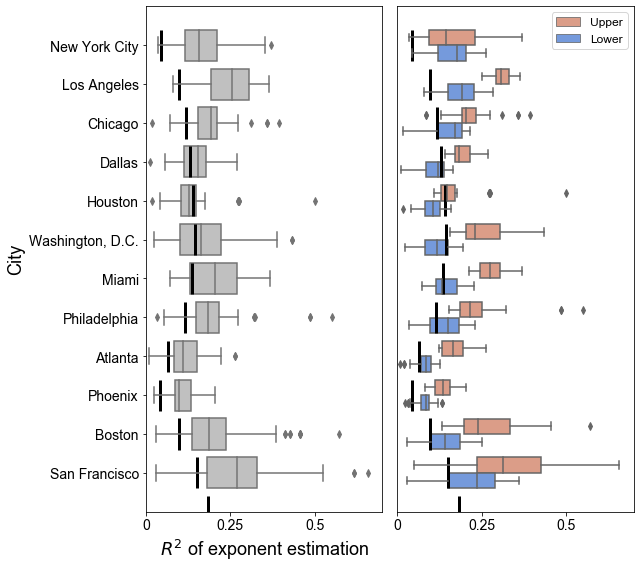

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(9, 8))

sns.boxplot(ax=ax[0], x="rsq", y="city", data=df_data, orient="h", color="silver")
for i, single in enumerate(df_data.rsq):
    ax[0].vlines(x=single, ymin=i-0.4, ymax=i+0.4, color="k", linewidth=3)
ax[0].set_xlabel("$R^2$ of exponent estimation", fontsize=18)
ax[0].set_ylabel("City", fontsize=18)
ax[0].set_xticks([0, 0.25, 0.5])
ax[0].set_xticklabels([0, 0.25, 0.5], fontsize=14)
ax[0].set_yticklabels(["New York City", "Los Angeles", "Chicago", "Dallas", 
                       "Houston", "Washington, D.C.", "Miami", "Philadelphia", 
                       "Atlanta", "Phoenix", "Boston", "San Francisco"], fontsize=14)
ax[0].set_xlim([0, 0.7])
ax[0].set_ylim([12, -1])

sns.boxplot(ax=ax[1], x="rsq", y="city", hue="Triangle", hue_order=["Upper", "Lower"], palette=["darksalmon", "cornflowerblue"], data=df_data, orient="h")
for i, single in enumerate(df_data.rsq):
    ax[1].vlines(x=single, ymin=i-0.4, ymax=i+0.4, color="k", linewidth=3)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_xticks([0, 0.25, 0.5])
ax[1].set_xticklabels([0, 0.25, 0.5], fontsize=14)
ax[1].set_yticks([])
ax[1].set_xlim([0, 0.7])
ax[1].set_ylim([12, -1])
ax[1].legend(fontsize=12)

plt.tight_layout()
plt.show()